# Crypto Currency Price prediction using K-NN model
## Steps followed are below; 
### 1.The k-nearest neighbor algorithm is imported from the scikit-learn package.
### 2.Create feature and target variables.
### 3.Split data into training and test data.
### 4.Generate a k-NN model using neighbors value.
### 5.Train or fit the data into the model.
### 6.Predict the future.
### 7.Plot graphs


## Import necessary modules

In [264]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn import neighbors
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd

## Create feature and target variables and split data into train and test data

In [47]:
#Target feature is: Adj Close

# Fuction to load csv file to a dataFrame and return train and target data
def get_data(symbol):
    data = pd.read_csv("data/{}.csv".format(symbol),index_col="Date",parse_dates =True,na_values=["nan"])
    data = data.dropna()# drop null rows

    # Split into 80% training and 20% test set 
    valid_fraction = 0.1
    data_srt = data.sort_values('Date')
    valid_rows = int(len(data_srt) * valid_fraction)
    train = data_srt[:-valid_rows * 2]
    test = data_srt[-valid_rows * 2:]
    
    #Creat X_train,y_train ,X_test,y_test
    y_train = train["Adj Close"]
    X_train = train.copy().drop("Adj Close",axis = 1)
    
    y_test = test["Adj Close"]
    X_test = test.copy().drop("Adj Close", axis = 1)
    return X_train,y_train,X_test,y_test

In [33]:
#Try displaying and see how the data is splitted
X_train,y_train,X_test,y_test= get_data("ETH-USD")
X_train
#y_train
#X_test
#y_test

Open        High         Low       Close        Volume
Date                                                                    
2018-05-15  731.143005  739.052002  700.994995  708.870972  2.523070e+09
2018-05-16  708.086975  710.200012  682.541016  707.049988  2.476130e+09
2018-05-17  708.718018  718.833008  668.833984  672.656982  2.350620e+09
2018-05-18  672.101990  695.031006  663.809021  694.367004  2.305740e+09
2018-05-19  695.072021  715.578003  686.791016  696.530029  2.021550e+09
...                ...         ...         ...         ...           ...
2019-12-16  143.139526  143.224854  132.456665  133.614029  8.992282e+09
2019-12-17  133.647186  134.011536  121.395081  122.603889  9.057166e+09
2019-12-18  122.656837  133.394165  119.780060  133.092194  1.186452e+10
2019-12-19  133.052780  134.190643  125.971664  129.321136  9.564699e+09
2019-12-20  129.384369  129.756302  126.985352  129.066055  8.173594e+09

[585 rows x 5 columns]

## Gridsearch to find best k value
These values may not all be accurate so make sure to test with values greater than 2 atleast 5 steps below  the given k value from grid search. I performed gridsearch to avoid the tideous plotting to search for k but its preferred for a small number of dataset (stock symbols).  

In [274]:
symbols =["BCH-USD","BTC-USD","DASH-USD","ETC-USD","ETH-USD","NEO-USD","TRX-USD","USDT-USD","XLM-USD"]
#BCH-USD:Bitcoin cash
#BTC-USD:Bitcoin
#DASH-USD:Dash
#ETC-USD:Ethereum classic
#ETH-USD:Ethereum
#NEO-USD:Neo
#TRX-USD:TRON
#USDT-USD:Tether
#XLM-USD:Stellar
#iterate through stock symbols
for symbol in symbols:
    
    X_train,y_train,_,_= get_data(symbol)

    #Giving a range of possible k values to choose from 
    l = list(range(2,8))# Always give a small range to avoid underfitting
    params = {'n_neighbors':l}

    #Defining knn model
    knn =KNeighborsRegressor()

    #implimenting gridsearch
    model = GridSearchCV(knn, params, cv=2, iid=True)# cv = 2 for cross validation
    model.fit(X_train,y_train)

    print("{} best k value : {}".format(symbol,model.best_params_))

BCH-USD best k value : {'n_neighbors': 4}
BTC-USD best k value : {'n_neighbors': 7}
DASH-USD best k value : {'n_neighbors': 7}
ETC-USD best k value : {'n_neighbors': 5}
ETH-USD best k value : {'n_neighbors': 7}
NEO-USD best k value : {'n_neighbors': 6}
TRX-USD best k value : {'n_neighbors': 2}
USDT-USD best k value : {'n_neighbors': 2}
XLM-USD best k value : {'n_neighbors': 7}


## Build K-NN model

In [37]:
def knn_model(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    return knn

## Fit and Predict the future (Adj Close prices)

In [181]:

#Apply model on data

def predicted_price(k,symbol):
    
    X_train,y_train,X_test,y_test= get_data(symbol)

    knn = KNeighborsRegressor(n_neighbors=k)

    knn.fit(X_train,y_train) # Fit model

    predictions = knn.predict(X_test)# Get predictions
    
    # Calculate accuracy deviation of model
    accuracy_dev = mean_absolute_error(predictions, y_test)
    
    df_y_test = pd.DataFrame(data=y_test)# Convert y_test to a dataframe for dataframe processing

    df_y_test.insert(1,"Predicted Adj Close",predictions)# Add preds column and values to y_test dataframe 

    #Getting magnitude of deviation between prediction and real value 
    deviation = abs(df_y_test["Adj Close"]-df_y_test["Predicted Adj Close"])

    df_y_test.insert(2,"Deviation",deviation)#insert  
    
    #Getting average accuracy in percentages
    y_mean = df_y_test["Adj Close"].mean()
    avg_error = accuracy_dev/y_mean
    avg_accuracy = (1-avg_error)*100
    
    return df_y_test,avg_accuracy,symbol,accuracy_dev 



In [193]:
# predict for any currency symbol
def preds_print(k,symbol):
    prediction_results,accuracy_per,symbol,accuracy_dev = predicted_price(k,symbol)
    print("Stock symbol: ",symbol)
    print("Prediction per day:\tAccuracy: {:.2f}%\tPrice deviation: {:.6f}".format( accuracy_per,accuracy_dev))
    return prediction_results.tail(10)# display last 10 prediction results

## Plot graphs

In [202]:
# function for ploting graphs that compare predicted values and real values
def plot_pred(k,symbol):
    prediction_results,_,symbol,_ = predicted_price(k,symbol)
    data = prediction_results.copy().drop("Deviation",axis = 1)
    plt.figure(figsize=(16,8))
    title = print("Graph showing the similarity between predicted Adj Close and Adj Close for {}".format(symbol))
    plt.title(title)
    plt.ylabel("Prices")
    sns.lineplot(data=data)
    plt.show()


### Bitcoin Cash

In [203]:
#Predictions
preds_print(4,"BCH-USD")#k value and symbol

Stock symbol:  BCH-USD
Prediction per day:	Accuracy: 69.90%	Price deviation: 85.258399


Adj Close  Predicted Adj Close   Deviation
Date                                                   
2020-05-06  245.816116           323.128677   77.312561
2020-05-07  252.661285           373.004539  120.343254
2020-05-08  261.440796           319.992912   58.552116
2020-05-09  266.137299           335.010918   68.873619
2020-05-10  232.797882           335.010918  102.213036
2020-05-11  234.954590           335.010918  100.056328
2020-05-12  233.119675           323.128677   90.009002
2020-05-13  239.160126           336.065453   96.905327
2020-05-14  241.856796           322.698288   80.841492
2020-05-16  237.134430           336.065453   98.931023

Graph showing the similarity between predicted Adj Close and Adj Close for BCH-USD


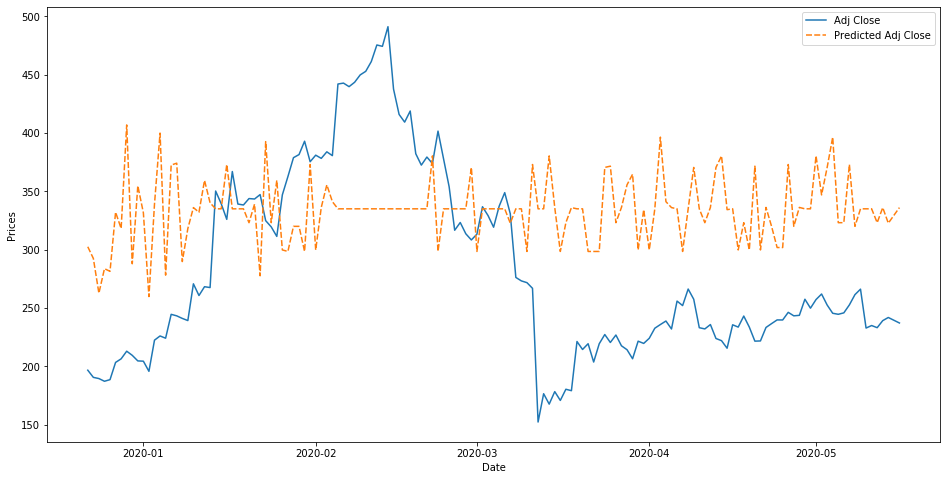

In [204]:
#Graph of similarity
plot_pred(4,"BCH-USD")


### Bitcoin

In [272]:
#Predictions
preds_print(7,"BTC-USD")#K value and symbol

Stock symbol:  BTC-USD
Prediction per day:	Accuracy: 79.90%	Price deviation: 1624.964006


Adj Close  Predicted Adj Close    Deviation
Date                                                     
2020-05-06  9268.761719         10350.080985  1081.319266
2020-05-07  9951.518555         10350.080985   398.562430
2020-05-08  9842.666016         10350.080985   507.414969
2020-05-09  9593.896484         10350.080985   756.184501
2020-05-10  8756.430664         10350.080985  1593.650321
2020-05-11  8601.795898         10350.080985  1748.285087
2020-05-12  8804.477539         10350.080985  1545.603446
2020-05-13  9269.987305         10350.080985  1080.093680
2020-05-14  9733.721680         10350.080985   616.359305
2020-05-16  9388.544922         10350.080985   961.536063

Graph showing the similarity between predicted Adj Close and Adj Close for BTC-USD


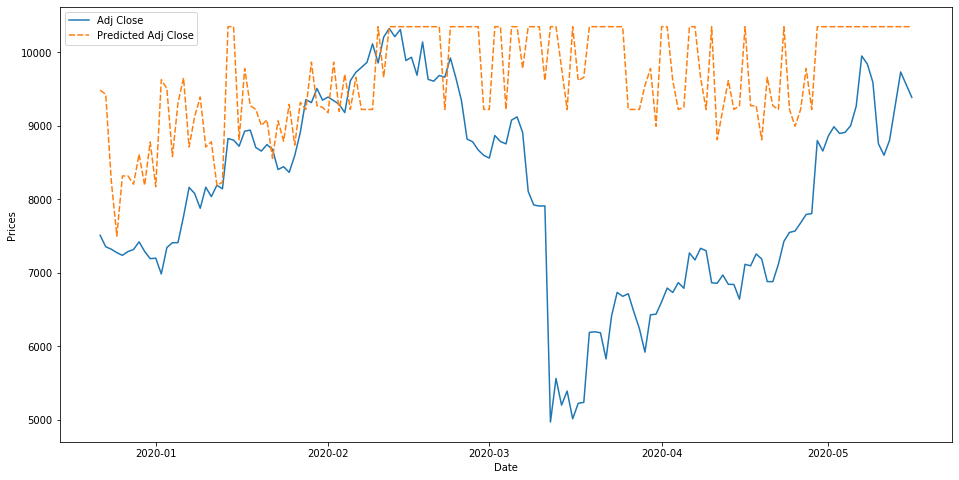

In [206]:
#Graph of similarity
plot_pred(7,"BTC-USD")

### DASH

In [221]:
#Predictions
preds_print(3,"DASH-USD")#K value and symbol

Stock symbol:  DASH-USD
Prediction per day:	Accuracy: 33.23%	Price deviation: 54.758934


Adj Close  Predicted Adj Close  Deviation
Date                                                 
2020-05-06  78.524315           149.465871  70.941556
2020-05-07  78.823517           149.465871  70.642354
2020-05-08  82.011566           135.211233  53.199667
2020-05-09  79.844383           149.465871  69.621488
2020-05-10  72.375458           132.609182  60.233724
2020-05-11  70.031769           135.211233  65.179464
2020-05-12  73.037209           149.465871  76.428662
2020-05-13  73.780243           149.465871  75.685628
2020-05-14  74.259865           149.465871  75.206006
2020-05-16  73.524620           149.465871  75.941251

Graph showing the similarity between predicted Adj Close and Adj Close for DASH-USD


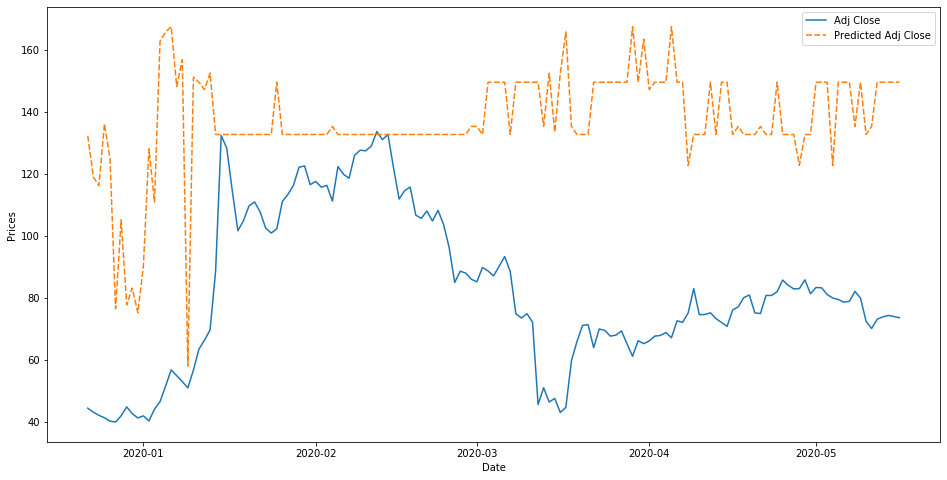

In [222]:
#Graph of similarity
plot_pred(3,"DASH-USD")

### Ethereum Classic

In [229]:
#Predictions
preds_print(4,"ETC-USD")#K value and symbol

Stock symbol:  ETC-USD
Prediction per day:	Accuracy: 69.25%	Price deviation: 2.160195


Adj Close  Predicted Adj Close  Deviation
Date                                                 
2020-05-06   6.949167              7.55859   0.609422
2020-05-07   7.097958              7.55859   0.460631
2020-05-08   7.176926              7.55859   0.381664
2020-05-09   7.084397              7.55859   0.474193
2020-05-10   6.202460              7.55859   1.356130
2020-05-11   6.038579              7.55859   1.520010
2020-05-12   6.080723              7.55859   1.477867
2020-05-13   6.214365              7.55859   1.344225
2020-05-14   6.254076              7.55859   1.304513
2020-05-16   6.727428              7.55859   0.831162

Graph showing the similarity between predicted Adj Close and Adj Close for ETC-USD


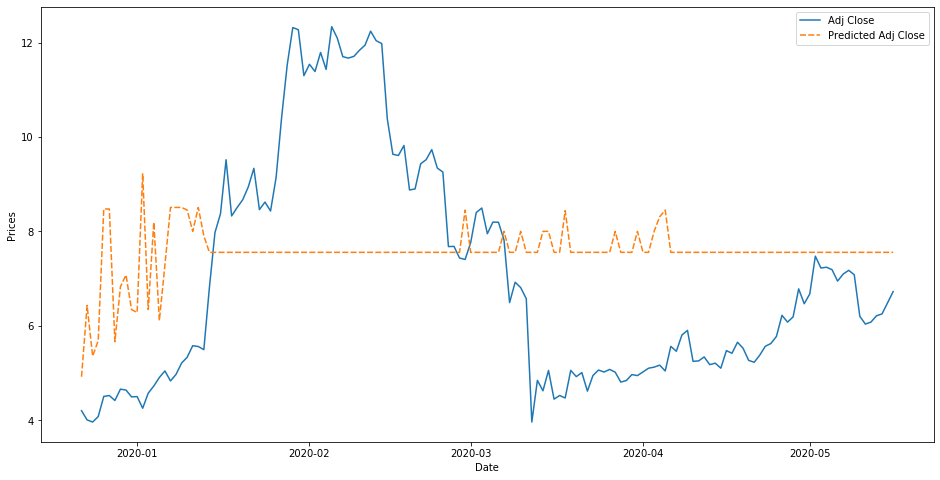

In [230]:
#Graph of similarity
plot_pred(4,"ETC-USD")

### Ethereum

In [239]:
#Predictions
preds_print(7,"ETH-USD")#K value and symbol

Stock symbol:  ETH-USD
Prediction per day:	Accuracy: 64.22%	Price deviation: 64.396863


Adj Close  Predicted Adj Close  Deviation
Date                                                  
2020-05-06  204.055786             260.2347  56.178914
2020-05-07  212.289398             260.2347  47.945302
2020-05-08  212.991577             260.2347  47.243123
2020-05-09  211.600128             260.2347  48.634572
2020-05-10  188.599564             260.2347  71.635136
2020-05-11  185.912842             260.2347  74.321858
2020-05-12  189.312500             260.2347  70.922200
2020-05-13  199.193283             260.2347  61.041417
2020-05-14  202.949097             260.2347  57.285603
2020-05-16  199.807358             260.2347  60.427342

Graph showing the similarity between predicted Adj Close and Adj Close for ETH-USD


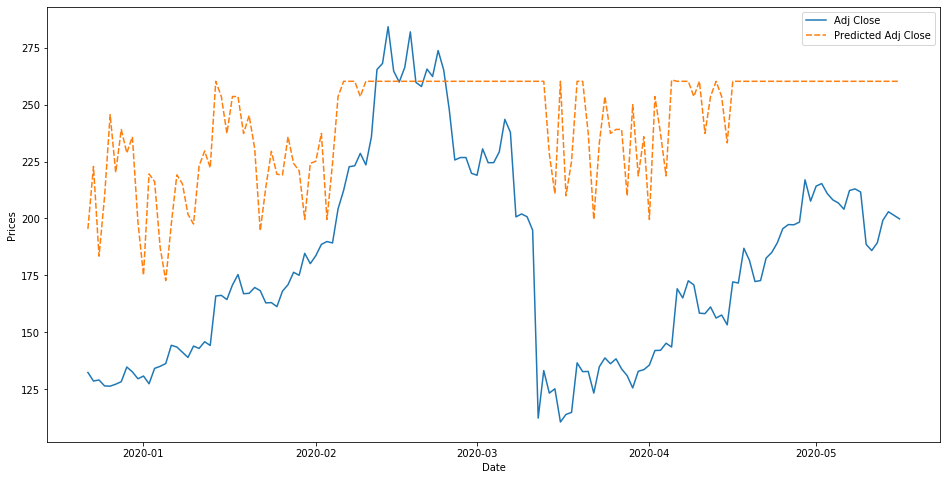

In [240]:
#Graph of similarity
plot_pred(7,"ETH-USD")

### Neo

In [265]:
#Predictions
preds_print(4,"NEO-USD")#K value and symbol

Stock symbol:  NEO-USD
Prediction per day:	Accuracy: 66.05%	Price deviation: 3.317696


Adj Close  Predicted Adj Close  Deviation
Date                                                 
2020-05-06   9.276558            15.377584   6.101026
2020-05-07   9.895577            15.662713   5.767136
2020-05-08  11.407124            14.823576   3.416452
2020-05-09  11.045865            14.755966   3.710101
2020-05-10   9.775537            14.755966   4.980429
2020-05-11   9.656457            14.979337   5.322879
2020-05-12   9.981519            14.222034   4.240515
2020-05-13  10.290450            12.773579   2.483129
2020-05-14  10.166015            13.564572   3.398557
2020-05-16   9.996977            12.626888   2.629911

Graph showing the similarity between predicted Adj Close and Adj Close for NEO-USD


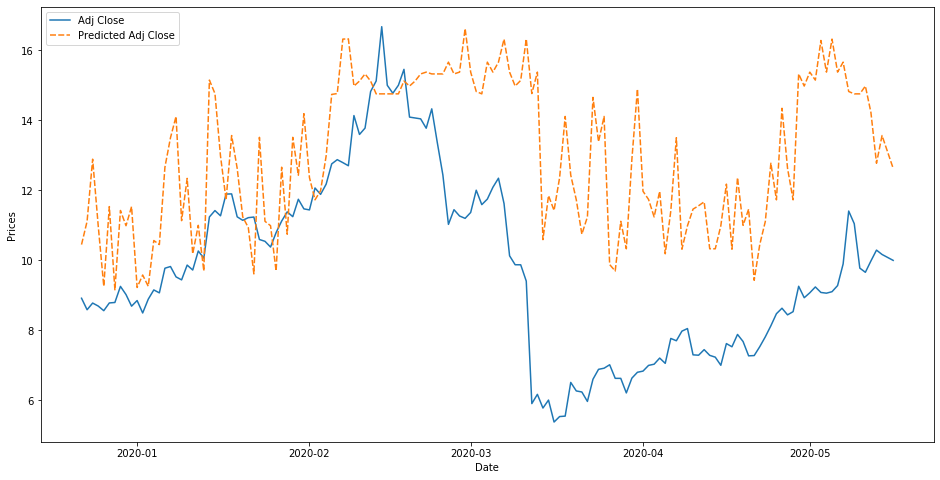

In [266]:
#Graph of similarity
plot_pred(4,"NEO-USD")

### TRON

In [252]:
#Predictions
preds_print(3,"TRX-USD")#K value and symbol

Stock symbol:  TRX-USD
Prediction per day:	Accuracy: 39.19%	Price deviation: 0.009424


Adj Close  Predicted Adj Close  Deviation
Date                                                 
2020-05-06   0.015828             0.030536   0.014708
2020-05-07   0.016056             0.026177   0.010121
2020-05-08   0.016325             0.026177   0.009852
2020-05-09   0.016198             0.030536   0.014338
2020-05-10   0.014283             0.026177   0.011894
2020-05-11   0.014022             0.026177   0.012155
2020-05-12   0.014559             0.030536   0.015977
2020-05-13   0.015003             0.030536   0.015533
2020-05-14   0.015263             0.030536   0.015273
2020-05-16   0.014930             0.030536   0.015606

Graph showing the similarity between predicted Adj Close and Adj Close for TRX-USD


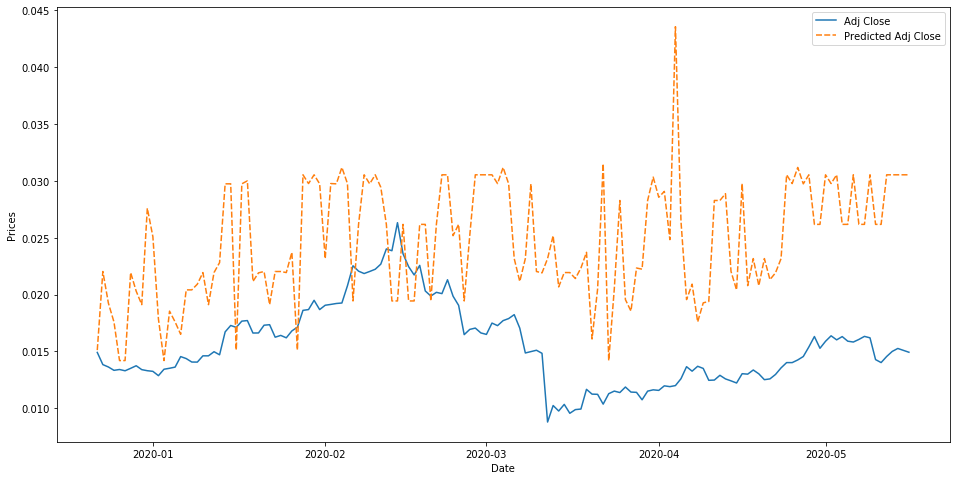

In [253]:
#Graph of similarity
plot_pred(3,"TRX-USD")

### Tether

In [254]:
#Predictions
preds_print(2,"USDT-USD")#K value and symbol

Stock symbol:  USDT-USD
Prediction per day:	Accuracy: 99.52%	Price deviation: 0.004797


Adj Close  Predicted Adj Close  Deviation
Date                                                 
2020-05-06   1.017931             0.996707   0.021224
2020-05-07   1.002895             0.996707   0.006188
2020-05-08   1.003764             0.996707   0.007057
2020-05-09   1.004818             0.996707   0.008111
2020-05-10   1.001055             0.996707   0.004348
2020-05-11   0.998364             0.996707   0.001657
2020-05-12   1.000735             0.996707   0.004028
2020-05-13   1.000232             0.996707   0.003525
2020-05-14   0.998860             0.996707   0.002153
2020-05-16   1.001062             0.996707   0.004355

Graph showing the similarity between predicted Adj Close and Adj Close for USDT-USD


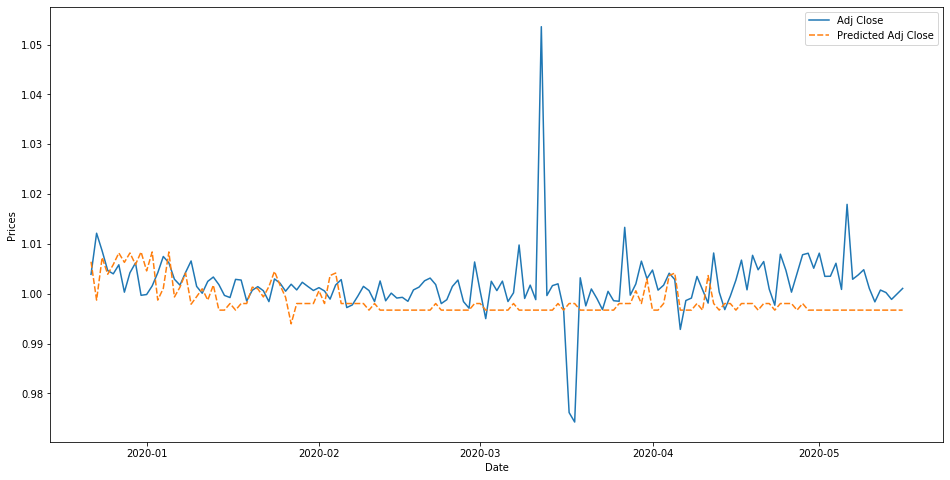

In [255]:
#Graph of similarity
plot_pred(2,"USDT-USD")

### Stellar

In [276]:
#Predictions
preds_print(4,"XLM-USD")#K value and symbol

Stock symbol:  XLM-USD
Prediction per day:	Accuracy: 6.35%	Price deviation: 0.052528


Adj Close  Predicted Adj Close  Deviation
Date                                                 
2020-05-06   0.071195             0.110394   0.039199
2020-05-07   0.072321             0.110588   0.038267
2020-05-08   0.073143             0.110212   0.037069
2020-05-09   0.071971             0.110212   0.038241
2020-05-10   0.064317             0.097331   0.033014
2020-05-11   0.062793             0.110588   0.047795
2020-05-12   0.069905             0.097935   0.028030
2020-05-13   0.069796             0.110394   0.040598
2020-05-14   0.069082             0.110394   0.041312
2020-05-16   0.067905             0.111946   0.044041

Graph showing the similarity between predicted Adj Close and Adj Close for XLM-USD


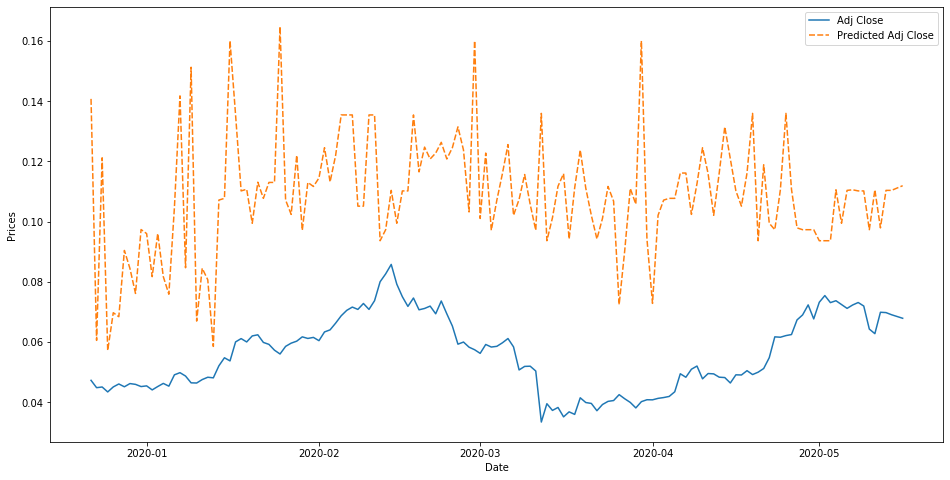

In [263]:
#Graph of similarity
plot_pred(4,"XLM-USD")